In [80]:
%matplotlib inline 
import pandas as pd 
import numpy as np
from math import sqrt
from itertools import product

# Visualization Modules
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# plot_tree(dt_reg) # For Large Datasets Tree Graph needs more visualization techniques

#Scipy Maths Models
import statsmodels.api as sm
from scipy import stats

# Machine Learning Training Modules
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression

# Model Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Model Selection and Validation Methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, ShuffleSplit

# Preprocessing Modules 
from sklearn.preprocessing import PolynomialFeatures

In [82]:
data_file = 'Breast_cancer_data.csv' # make sure the path of the file is correct
df = pd.read_csv(data_file)
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [4]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [5]:
df.groupby('diagnosis').count()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
diagnosis,,,,,
0,212,212,212,212,212
1,357,357,357,357,357


In [7]:
df.corr()['diagnosis']

mean_radius       -0.730029
mean_texture      -0.415185
mean_perimeter    -0.742636
mean_area         -0.708984
mean_smoothness   -0.358560
diagnosis          1.000000
Name: diagnosis, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85d21635f8>,
      dtype=object)

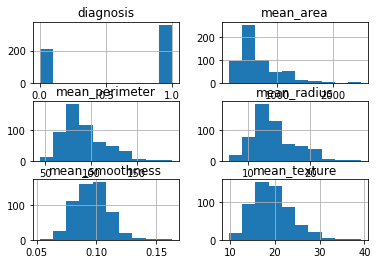

In [8]:
df.hist()

In [73]:
features = list(df.columns.drop('diagnosis'))
label = ['diagnosis']

<class 'numpy.ndarray'> (6, 913)
<class 'numpy.ndarray'> (6, 913)


/home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: X has 2 features per sample; expecting 1

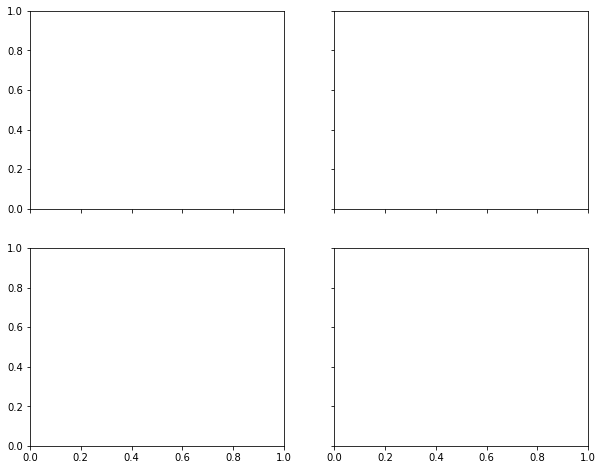

In [96]:
h=0.2
penalty = 'l2'
x_min, x_max = df[['mean_radius', 'mean_perimeter']].values.min()- .5, df[['mean_radius', 'mean_perimeter']].values.max() + .5
y_min, y_max = df['mean_smoothness'].values.min() - .5, df['mean_smoothness'].values.max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

print(type(xx), xx.shape)
print(type(yy), yy.shape)


C_Values = [50, 10, 1, 0.01]
pos = product([0, 1], [0, 1])
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for c, position in zip(C_Values, pos):
    lr_clf = LogisticRegression(C=c, penalty=penalty)
    lr_clf.fit(df.mean_radius.values.reshape(-1, 1), df.diagnosis)
    Z = lr_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    i, j  = position
    axarr[i, j].contour(xx, yy, Z)
    axarr[i, j].scatter(df.x0, df.x1, c=y)
    axarr[i, j].set_title("C Value : {}, Penalty : {} , Co_eff : {}".format(c, penalty, lr_clf.coef_))

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[value], test_size=0.20, shuffle=False) 

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

/home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [61]:
features

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness']

In [62]:
value

['diagnosis']

In [76]:
df['diagnosis'] = 0

In [77]:
df.diagnosis

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    0
Name: diagnosis, Length: 569, dtype: int64

In [92]:
df.mean_radius.values.reshape(-1,1)

array([[17.99 ],
       [20.57 ],
       [19.69 ],
       [11.42 ],
       [20.29 ],
       [12.45 ],
       [18.25 ],
       [13.71 ],
       [13.   ],
       [12.46 ],
       [16.02 ],
       [15.78 ],
       [19.17 ],
       [15.85 ],
       [13.73 ],
       [14.54 ],
       [14.68 ],
       [16.13 ],
       [19.81 ],
       [13.54 ],
       [13.08 ],
       [ 9.504],
       [15.34 ],
       [21.16 ],
       [16.65 ],
       [17.14 ],
       [14.58 ],
       [18.61 ],
       [15.3  ],
       [17.57 ],
       [18.63 ],
       [11.84 ],
       [17.02 ],
       [19.27 ],
       [16.13 ],
       [16.74 ],
       [14.25 ],
       [13.03 ],
       [14.99 ],
       [13.48 ],
       [13.44 ],
       [10.95 ],
       [19.07 ],
       [13.28 ],
       [13.17 ],
       [18.65 ],
       [ 8.196],
       [13.17 ],
       [12.05 ],
       [13.49 ],
       [11.76 ],
       [13.64 ],
       [11.94 ],
       [18.22 ],
       [15.1  ],
       [11.52 ],
       [19.21 ],
       [14.71 ],
       [13.05 